<h2>Diabetes Risk Prediction EDA</h3>
<h5>Contributors:</h5>
<ul>
    <li>Fiorenza Adelia Nalle 5027231053</li>
    <li>Adlya Isriena Aftarisya 5027231066</li>
    <li>Harwinda 5027231079</li>
    <li>Aryasatya Alaauddin 5027231082</li>
</ul>
<h2>The Dataset</h2>
<h5>Diabetes adalah penyakit kronis yang mempengaruhi jutaan orang di seluruh dunia, dan deteksi dini sangat penting untuk pengelolaan yang efektif. Dataset ini dirancang untuk membantu memprediksi risiko diabetes berdasarkan berbagai gejala medis dan kondisi kesehatan. Dataset ini berisi 520 observasi dan 17 atribut, termasuk faktor seperti usia, jenis kelamin, serta gejala seperti poliuria (sering buang air kecil), polidipsia (sering merasa haus), penurunan berat badan secara tiba-tiba, dan obesitas. Variabel target (class) menunjukkan apakah seseorang menderita diabetes (Positive) atau tidak (Negative).</h5>
<h2>Explanatory Data Analysis</h2>

In [61]:
# import requirements library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
# Membaca dataset
data = pd.read_csv('/Users/tarisa/Documents/penting/kuliah/smt-4/AI/diabetes-risk-prediction-eda/dataset/diabetes_risk_prediction_dataset.csv')

# Membersihkan data dari spasi dan mengubah menjadi huruf kecil
data = data.apply(lambda x: x.astype(str).str.strip().str.lower() if x.dtype == "object" else x)

# Merubah Gender dan class menjadi tipe data kategori
data['Gender'] = data['Gender'].astype('category')
data['class'] = data['class'].astype('category')

# Menampilkan 5 data teratas
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,male,no,yes,no,yes,no,no,no,yes,no,yes,no,yes,yes,yes,positive
1,58,male,no,no,no,yes,no,no,yes,no,no,no,yes,no,yes,no,positive
2,41,male,yes,no,no,yes,yes,no,no,yes,no,yes,no,yes,yes,no,positive
3,45,male,no,no,yes,yes,yes,yes,no,yes,no,yes,no,no,no,no,positive
4,60,male,yes,yes,yes,yes,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,positive


In [63]:
# Mendapatkan bentuk dari data
data.shape

(520, 17)

In [64]:
# Mendapatkan informasi dari data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 520 non-null    int64   
 1   Gender              520 non-null    category
 2   Polyuria            520 non-null    object  
 3   Polydipsia          520 non-null    object  
 4   sudden weight loss  520 non-null    object  
 5   weakness            520 non-null    object  
 6   Polyphagia          520 non-null    object  
 7   Genital thrush      520 non-null    object  
 8   visual blurring     520 non-null    object  
 9   Itching             520 non-null    object  
 10  Irritability        520 non-null    object  
 11  delayed healing     520 non-null    object  
 12  partial paresis     520 non-null    object  
 13  muscle stiffness    520 non-null    object  
 14  Alopecia            520 non-null    object  
 15  Obesity             520 non-null    obje

In [65]:
# Mendapatkan statistik deskriptif dari data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0


In [66]:
categorical_data = data.select_dtypes(include=['object', 'category'])
categorical_data.describe().T

,count,unique,top,freq
Gender,520,2,male,328
Polyuria,520,2,no,262
Polydipsia,520,2,no,287
sudden weight loss,520,2,no,303
weakness,520,2,yes,305
Polyphagia,520,2,no,283
Genital thrush,520,2,no,404
visual blurring,520,2,no,287
Itching,520,2,no,267
Irritability,520,2,no,394


In [67]:
# Memeriiksa missing value
data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [68]:
# Memeriksa duplikasi data
data.duplicated().sum()

np.int64(269)

In [69]:
# Menghapus data yang duplikat
data = data.drop_duplicates()

# Memeriksa kembali duplikasi data
data.duplicated().sum()

np.int64(0)

In [70]:
# Memeriksa balance data
data.value_counts("class")

class
positive    173
negative     78
Name: count, dtype: int64

In [71]:
data.value_counts("Gender")

Gender
male      160
female     91
Name: count, dtype: int64

In [72]:
# Ubah kategori Gender
data['Gender'] = data['Gender'].cat.rename_categories({"male": True, "female": False})

# Ubah kategori class
data['class'] = data['class'].cat.rename_categories({"positive": True, "negative": False})

# Ubah 'yes'/'no' menjadi True/False untuk semua kolom yang mengandung string
yes_no_cols = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia',
               'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing',
               'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']

data[yes_no_cols] = data[yes_no_cols].apply(lambda x: x.map({'yes': True, 'no': False}))

# Cek hasil perubahan
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,True,False,True,False,True,False,False,False,True,False,True,False,True,True,True,True
1,58,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,True
2,41,True,True,False,False,True,True,False,False,True,False,True,False,True,True,False,True
3,45,True,False,False,True,True,True,True,False,True,False,True,False,False,False,False,True
4,60,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True


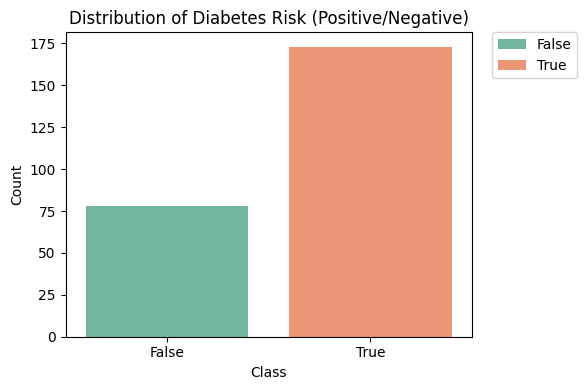

In [ ]:
# Visualisasi setiap label (class)
plt.figure(figsize=(6, 4))
sns.countplot(x='class', hue='class', data=data, palette='Set2')
plt.title('Distribution of Diabetes Risk (Positive/Negative)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

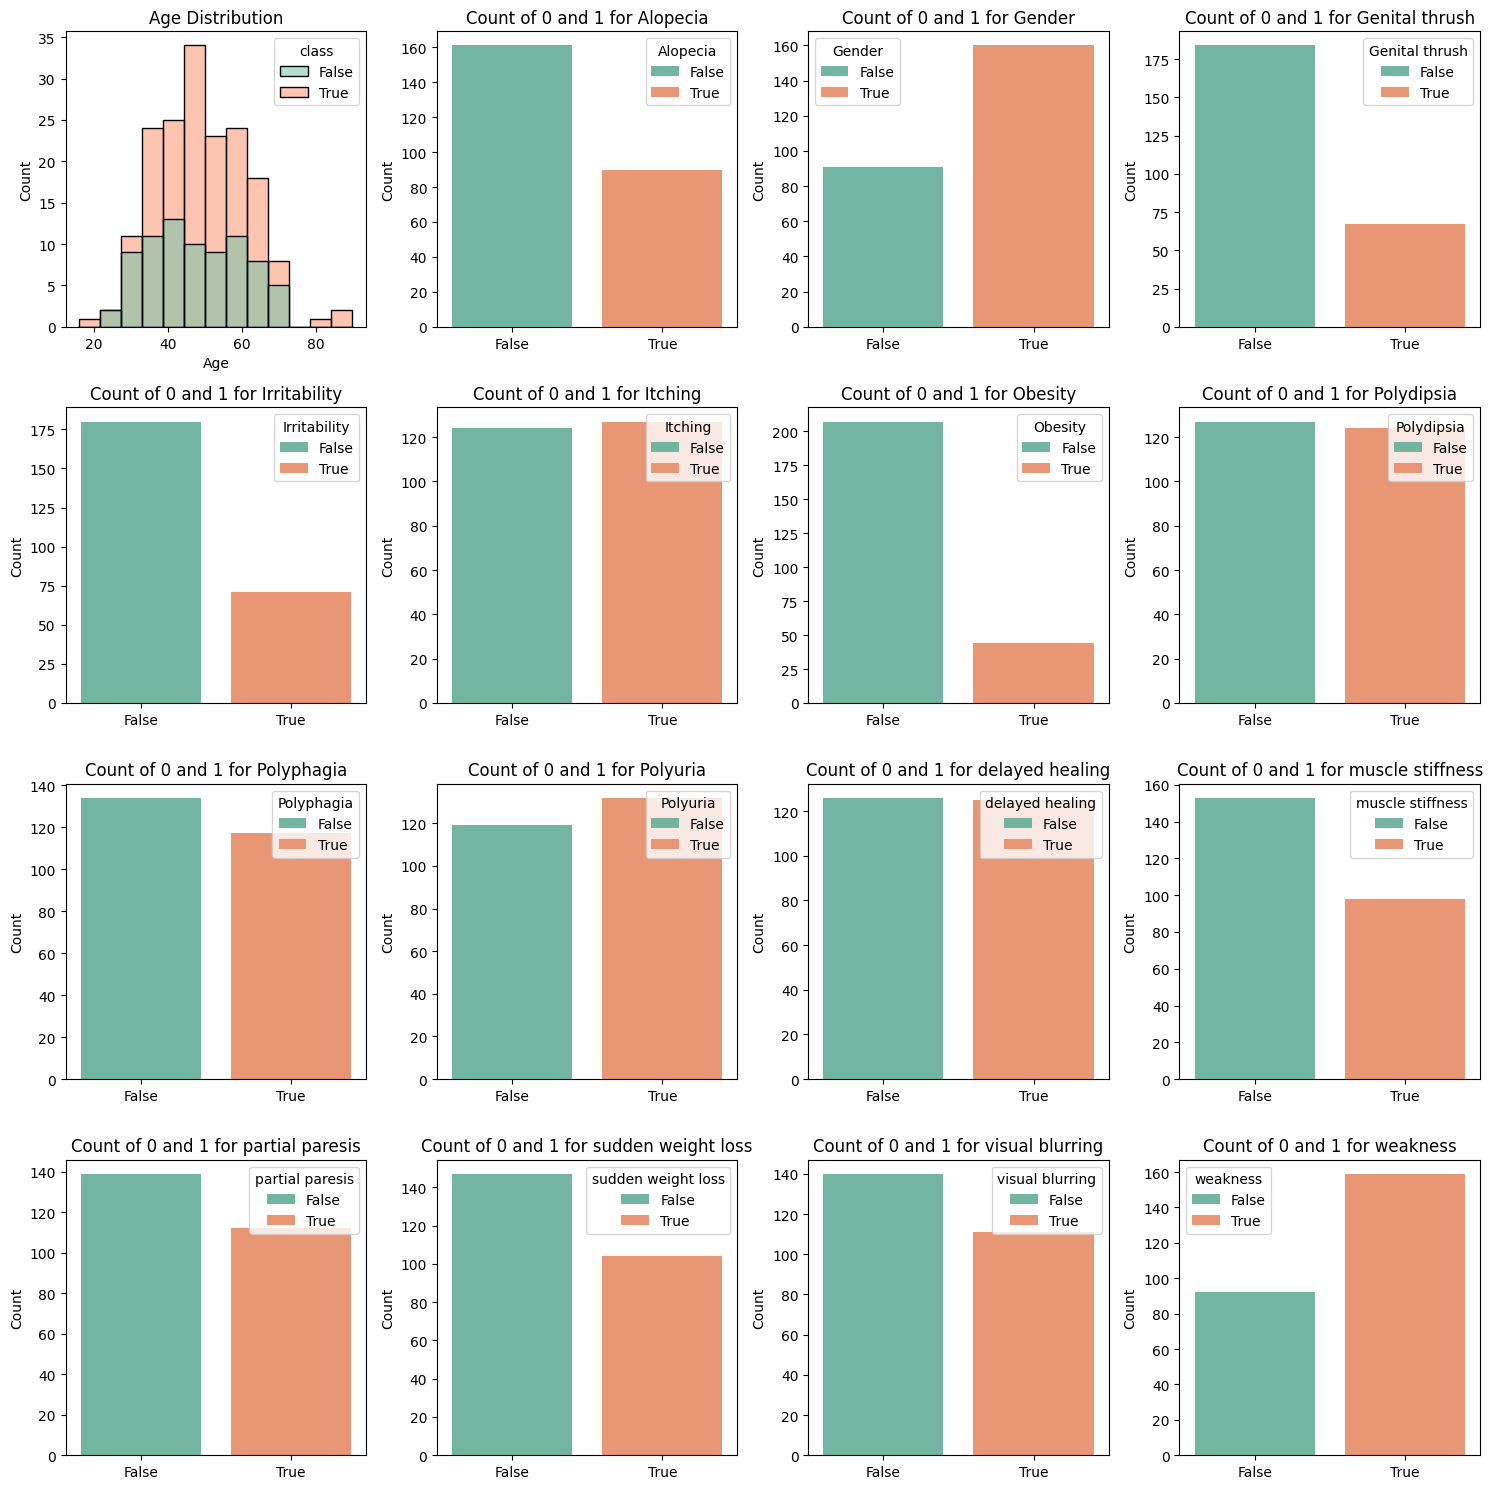

In [ ]:
columns_to_visualize = data.columns.difference(['Age', 'class'])

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
axes = axes.flatten()

# Relasi antara Age dan class
sns.histplot(data=data, x='Age', hue='class', kde=False, ax=axes[0], palette='Set2')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Relasi antara variabel lain dengan class
for i, col in enumerate(columns_to_visualize):
    sns.countplot(x=data[col], hue=data[col], ax=axes[i+1], palette='Set2')
    axes[i+1].set_title(f'Count of 0 and 1 for {col}')
    axes[i+1].set_xlabel('')
    axes[i+1].set_ylabel('Count')

plt.tight_layout()
plt.show()